In [1]:
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import rmse, rmsle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Data/Kaggle/StoreSales/darts_multivariate.csv", parse_dates=["date"])

In [3]:
df.head()

,date,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,2013-01-01,8,30,0.0,0,3,93.140000,18,12,3,8,2,1,1,2013
1,2013-01-02,8,30,0.0,0,4,93.140000,18,12,3,8,3,2,1,2013
2,2013-01-03,8,30,0.0,0,4,92.970000,18,12,3,8,4,3,1,2013
3,2013-01-04,8,30,0.0,0,4,93.120000,18,12,3,8,5,4,1,2013
4,2013-01-05,8,30,0.0,0,4,93.159203,18,12,3,8,6,5,1,2013


In [4]:
ts = TimeSeries.from_dataframe(df, value_cols=["sales"])

In [5]:
training_size = len(ts) - 16

In [6]:
train = ts[:training_size]
val = ts[training_size:]

In [7]:
model = ExponentialSmoothing()
model.fit(train)

/Users/yrrebeere/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [8]:
predictions = model.predict(n=len(val))

In [9]:
rmse = rmse(val, predictions)
rmsle = rmsle(val, predictions)

In [10]:
val = val.pd_series().tolist()
predictions = predictions.pd_series().tolist()

In [11]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Error (RMSE): 1155.9268194396186
Root Mean Squared Logarithmic Error (RMSLE): 0.24834295769922735


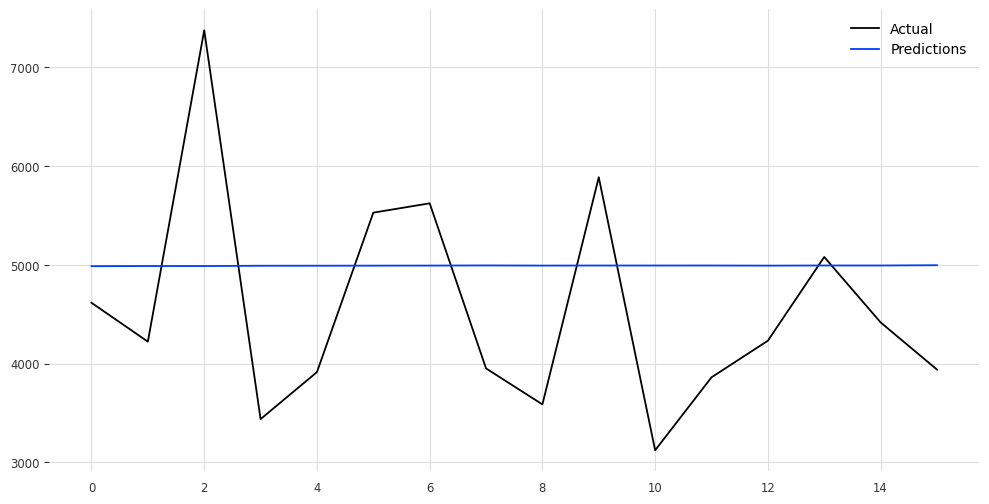

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(val, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()